After performing the data wrangling process and some necessary modification, now we try to dig the dataset insights. 

# Data Collection

## Importing libraries

In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Loading dataset

In [20]:
# load the dataset as pandas DataFrame
df = pd.read_csv('/home/er_bim/creditcard_payment_prediction/notebooks/data/modified_creditcard_data.csv')

# show the random data
df.head(5)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,CURRENT_BAL,default_pred
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,689,0,0,0,0,7015,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3455,3261,0,1000,1000,1000,0,2000,14077,1
2,90000,2,2,2,34,0,0,0,0,0,...,14948,15549,1518,1500,1000,1000,1000,5000,95635,1
3,50000,2,2,1,37,0,0,0,0,0,...,28959,29547,2000,2019,1200,1100,1069,1000,223946,1
4,50000,1,2,1,57,-1,0,-1,0,0,...,19146,19131,2000,36681,10000,9000,689,679,50969,1


Now let's check the dataset's information

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29965 entries, 0 to 29964
Data columns (total 25 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   LIMIT_BAL     29965 non-null  int64
 1   SEX           29965 non-null  int64
 2   EDUCATION     29965 non-null  int64
 3   MARRIAGE      29965 non-null  int64
 4   AGE           29965 non-null  int64
 5   PAY_1         29965 non-null  int64
 6   PAY_2         29965 non-null  int64
 7   PAY_3         29965 non-null  int64
 8   PAY_4         29965 non-null  int64
 9   PAY_5         29965 non-null  int64
 10  PAY_6         29965 non-null  int64
 11  BILL_AMT1     29965 non-null  int64
 12  BILL_AMT2     29965 non-null  int64
 13  BILL_AMT3     29965 non-null  int64
 14  BILL_AMT4     29965 non-null  int64
 15  BILL_AMT5     29965 non-null  int64
 16  BILL_AMT6     29965 non-null  int64
 17  PAY_AMT1      29965 non-null  int64
 18  PAY_AMT2      29965 non-null  int64
 19  PAY_AMT3      29965 non-n

The entire columns in the dataset are recognized as numeric, we need to convert some columns as the categorical ones.

In [22]:
# define the categorical columns
cat_cols = ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'default_pred']
df[cat_cols] = df[cat_cols].astype(str)

# Data Distribution Checking

## Numeric Column

In [23]:
# check the basic statistical summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
LIMIT_BAL,29965.0,167442.005006,129760.135222,10000.0,50000.0,140000.0,240000.0,1000000.0
AGE,29965.0,35.487969,9.219459,21.0,28.0,34.0,41.0,79.0
BILL_AMT1,29965.0,51283.009778,73658.132403,-165580.0,3595.0,22438.0,67260.0,964511.0
BILL_AMT2,29965.0,49236.366294,71195.567392,-69777.0,3010.0,21295.0,64109.0,983931.0
BILL_AMT3,29965.0,47067.916069,69371.352323,-157264.0,2711.0,20135.0,60201.0,1664089.0
BILL_AMT4,29965.0,43313.329885,64353.514373,-170000.0,2360.0,19081.0,54601.0,891586.0
BILL_AMT5,29965.0,40358.334390,60817.130623,-81334.0,1787.0,18130.0,50247.0,927171.0
BILL_AMT6,29965.0,38917.012281,59574.147742,-339603.0,1262.0,17124.0,49252.0,961664.0
PAY_AMT1,29965.0,5670.099316,16571.849467,0.0,1000.0,2102.0,5008.0,873552.0
PAY_AMT2,29965.0,5927.983180,23053.456645,0.0,850.0,2010.0,5000.0,1684259.0


In [24]:
# create a list of numerical columns
num_cols = df.select_dtypes(include=['int64']).columns.tolist()

In [25]:
def num_distribution(col):
    """A function to visualize the data distribution for each numerical column.
    The histogram informs the data distribution, and the boxplot gives the detailed data on the outliers.
    """
    # Create a figure with two subplots
    fig, (ax_hist, ax_box) = plt.subplots(2, 1, figsize=(10, 8), gridspec_kw={'height_ratios': [2, 1]})

    # Histogram with KDE
    sns.histplot(df[col], bins=30, kde=True, ax=ax_hist)
    ax_hist.set_title(f"Distribution of {str(col).upper()}")
    ax_hist.set_xlabel(col)
    ax_hist.set_ylabel('Frequency')

    # Box plot
    sns.boxplot(x=df[col], ax=ax_box)
    ax_box.set_xlabel(col)
    ax_box.set_title(f"Boxplot of {str(col).upper()}")

    # Show the plot
    plt.tight_layout()
    plt.show()

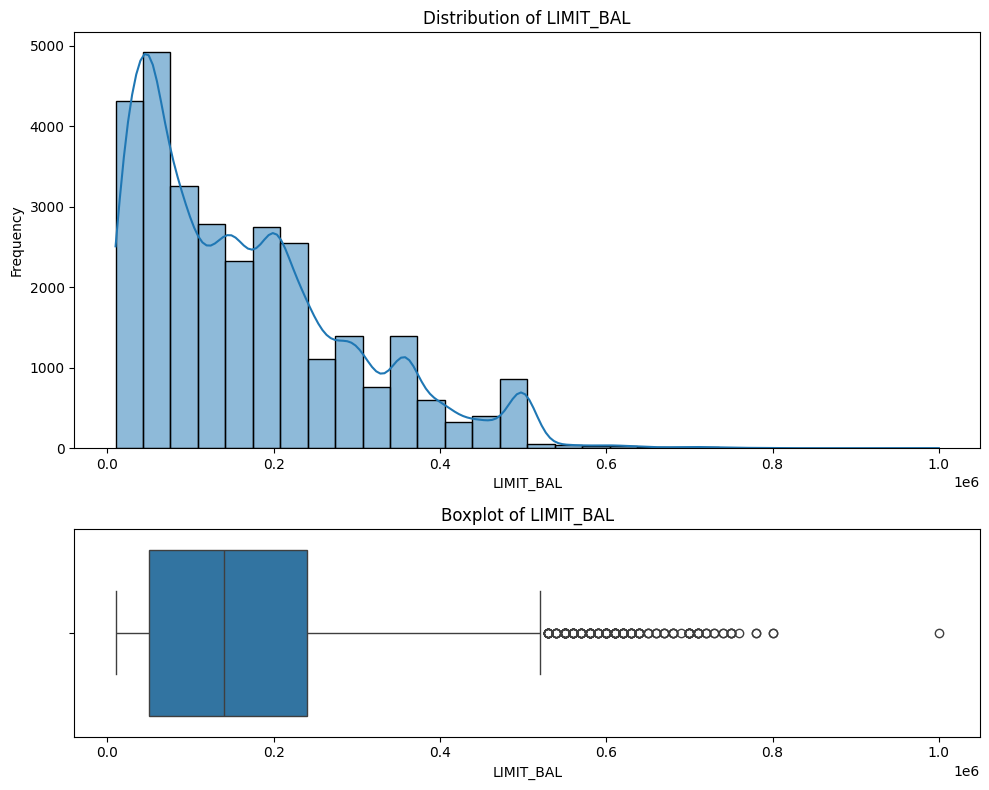

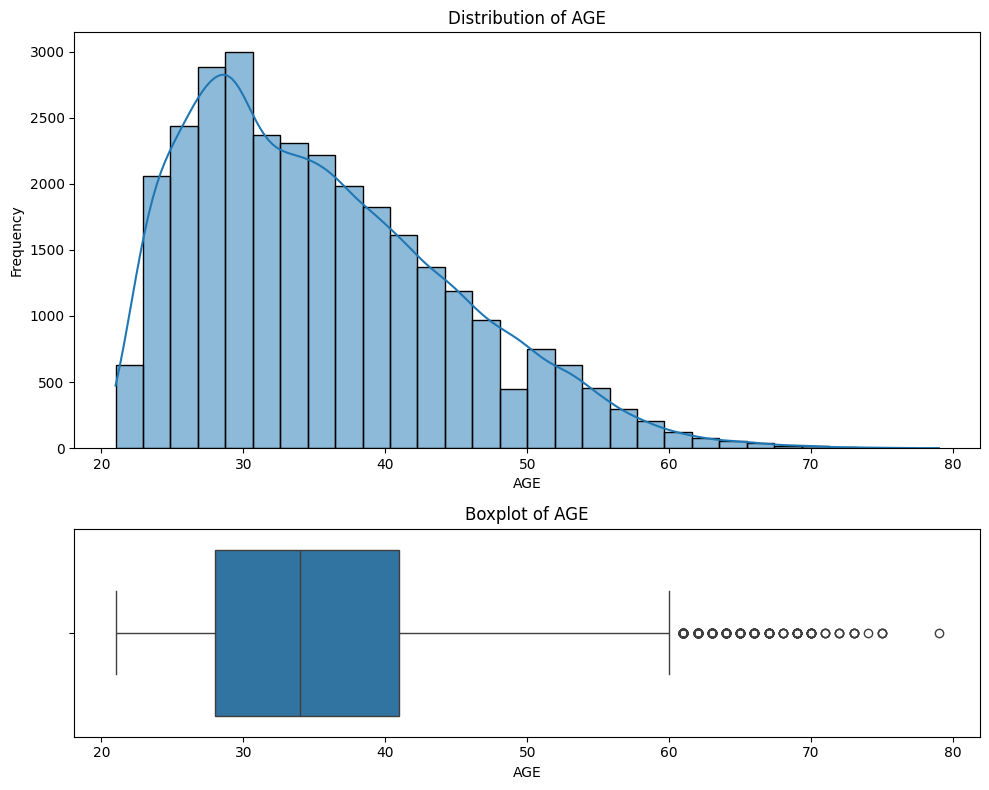

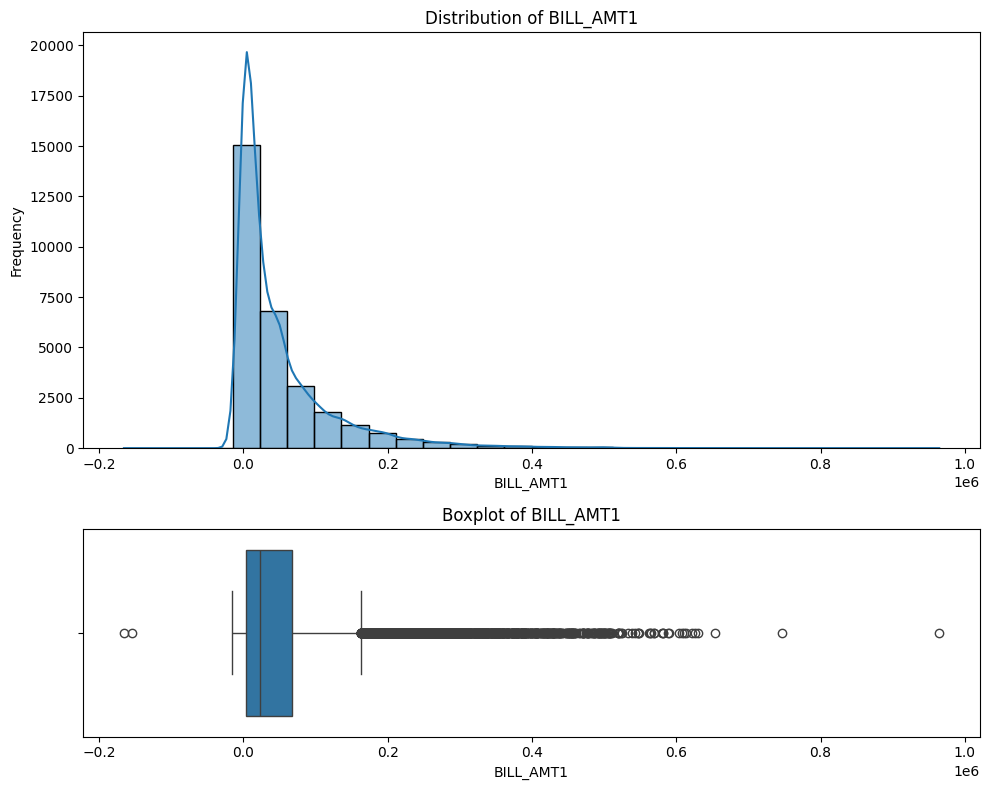

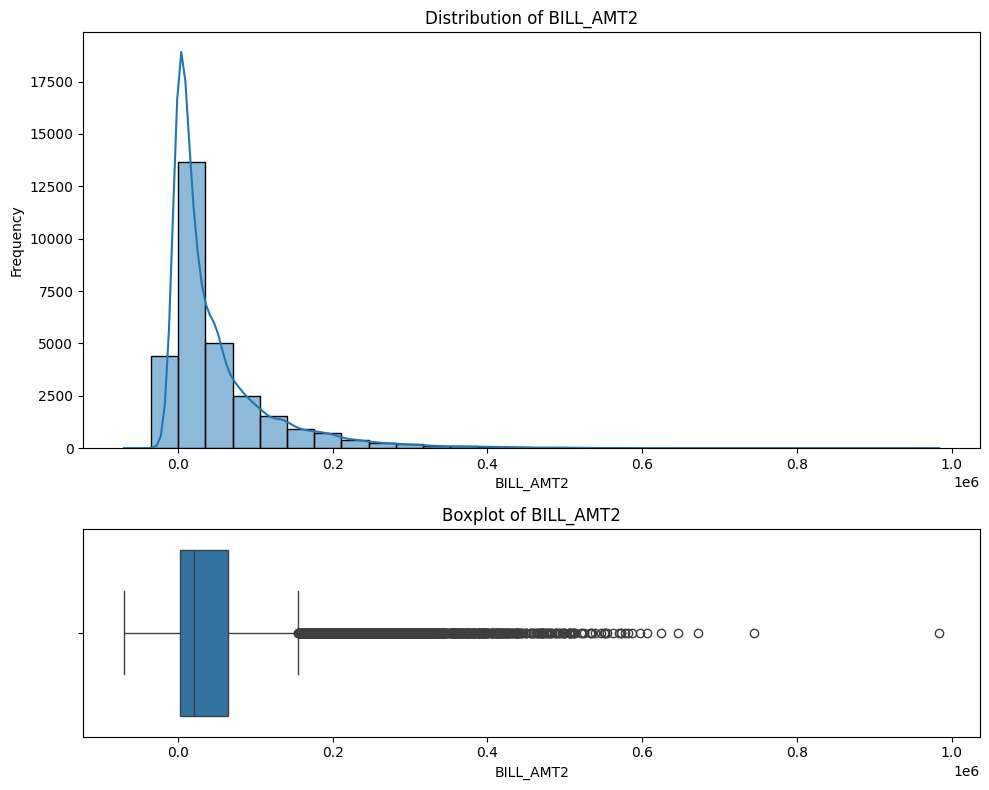

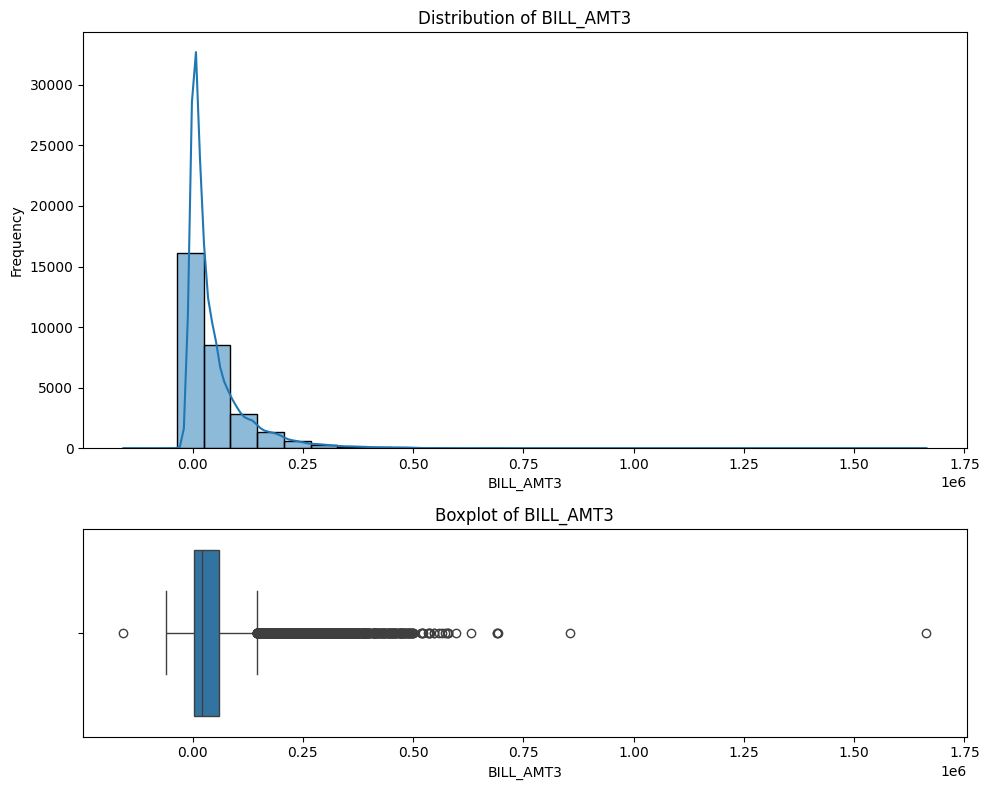

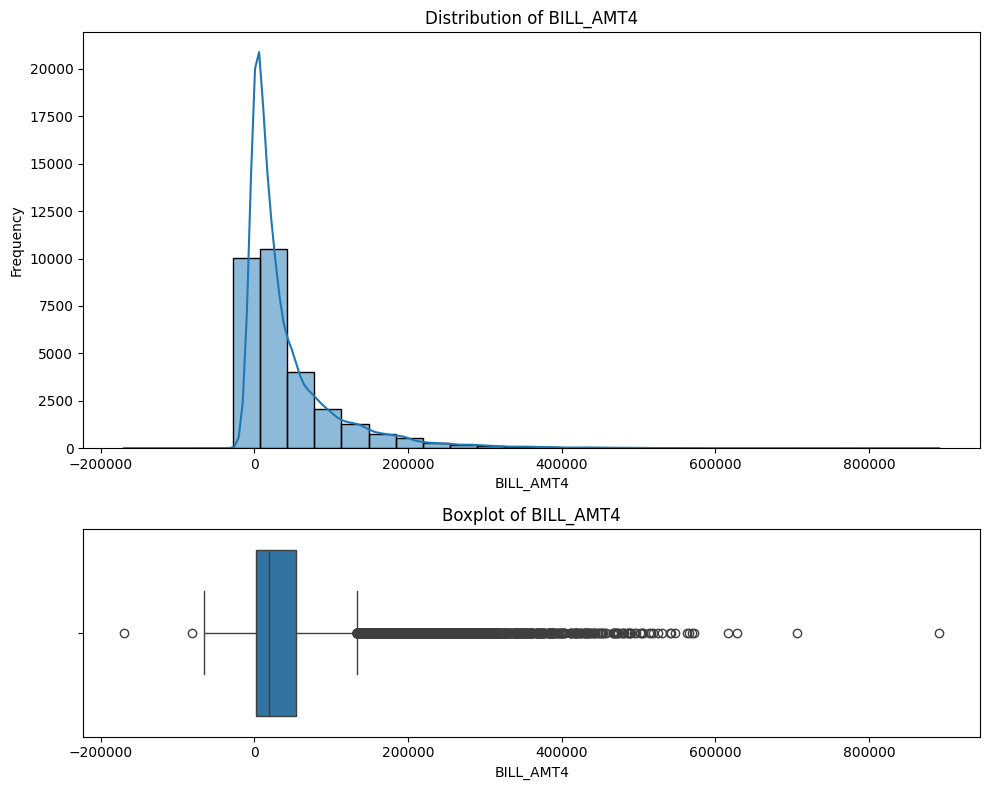

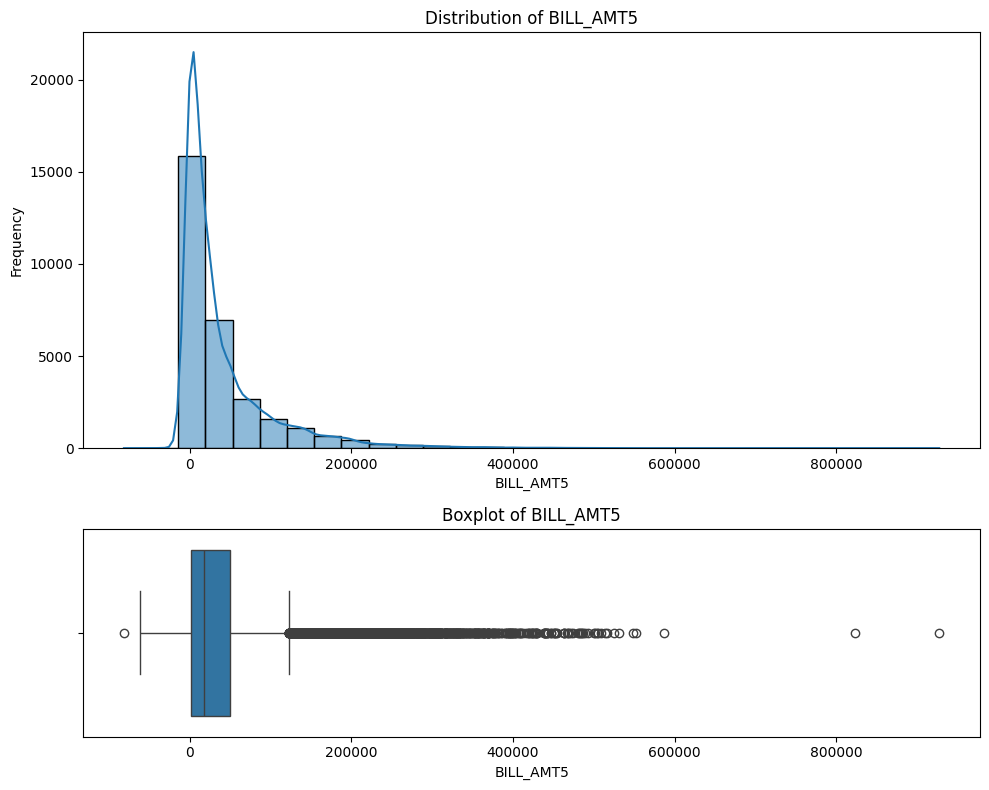

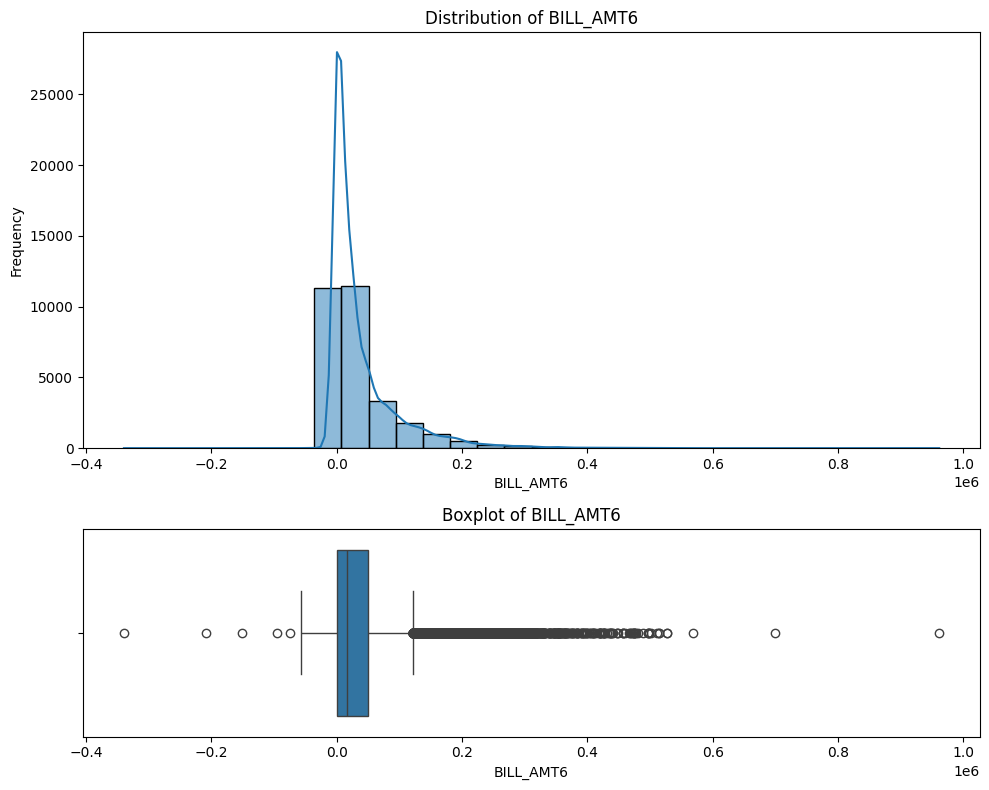

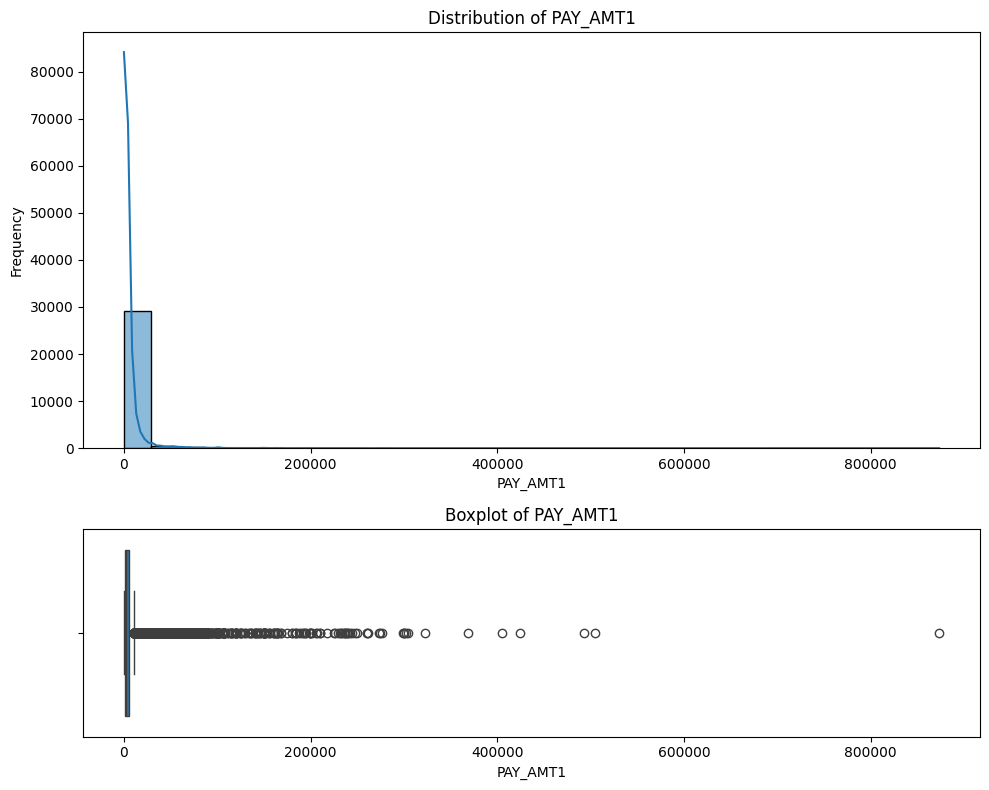

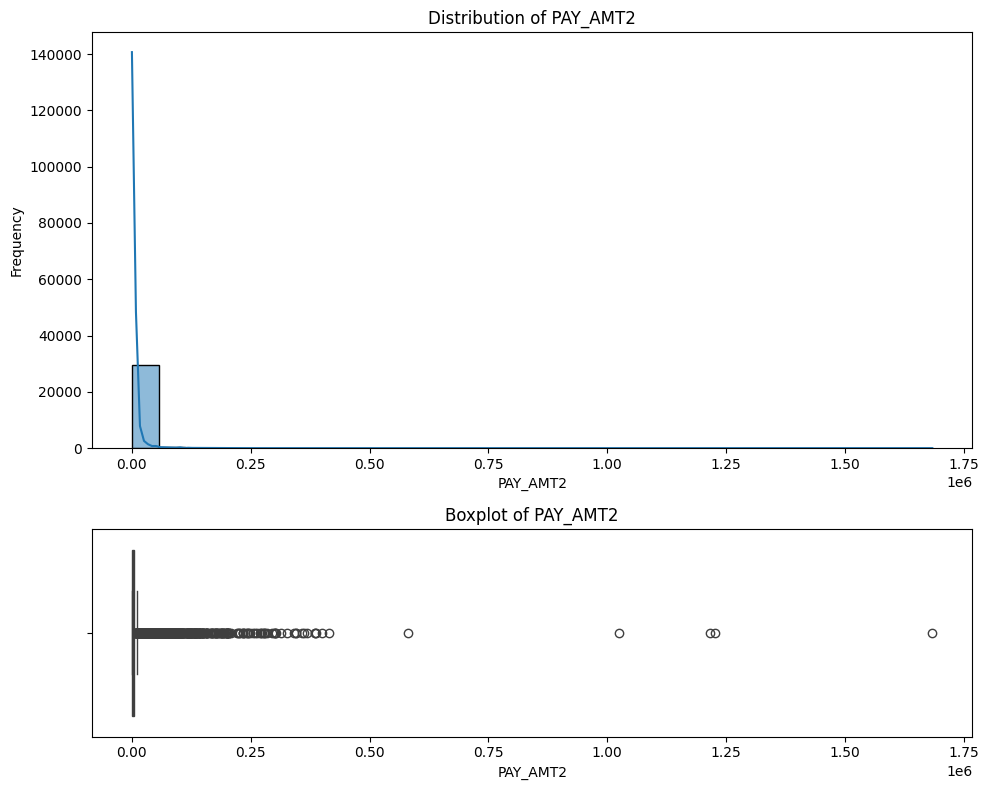

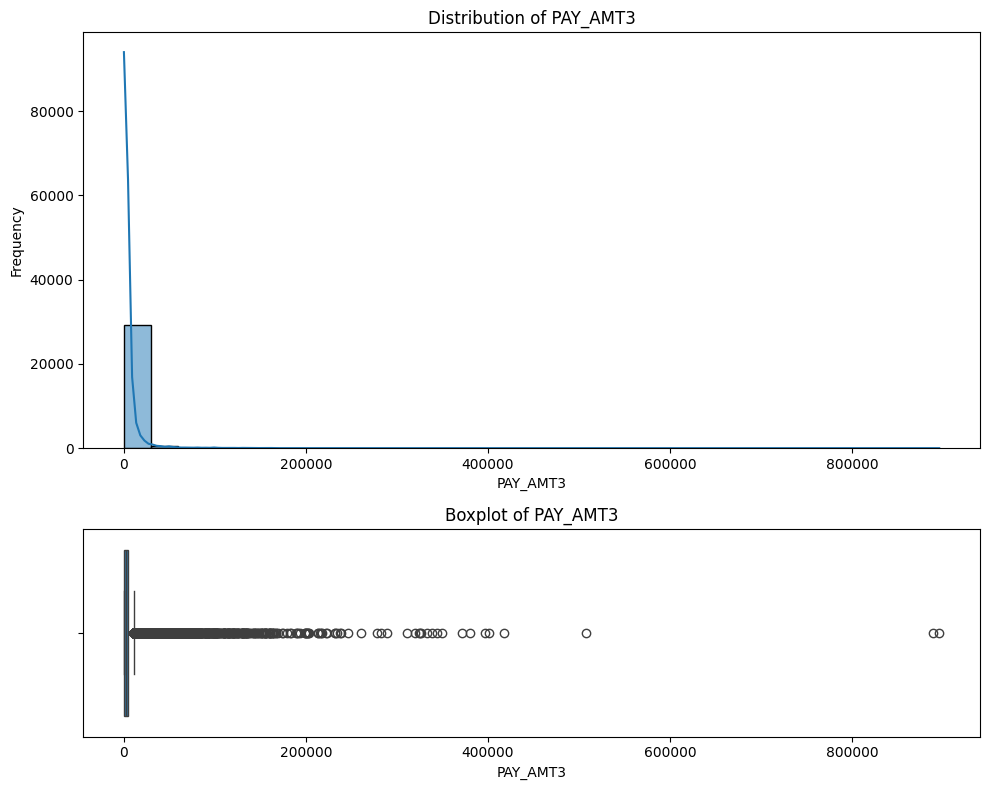

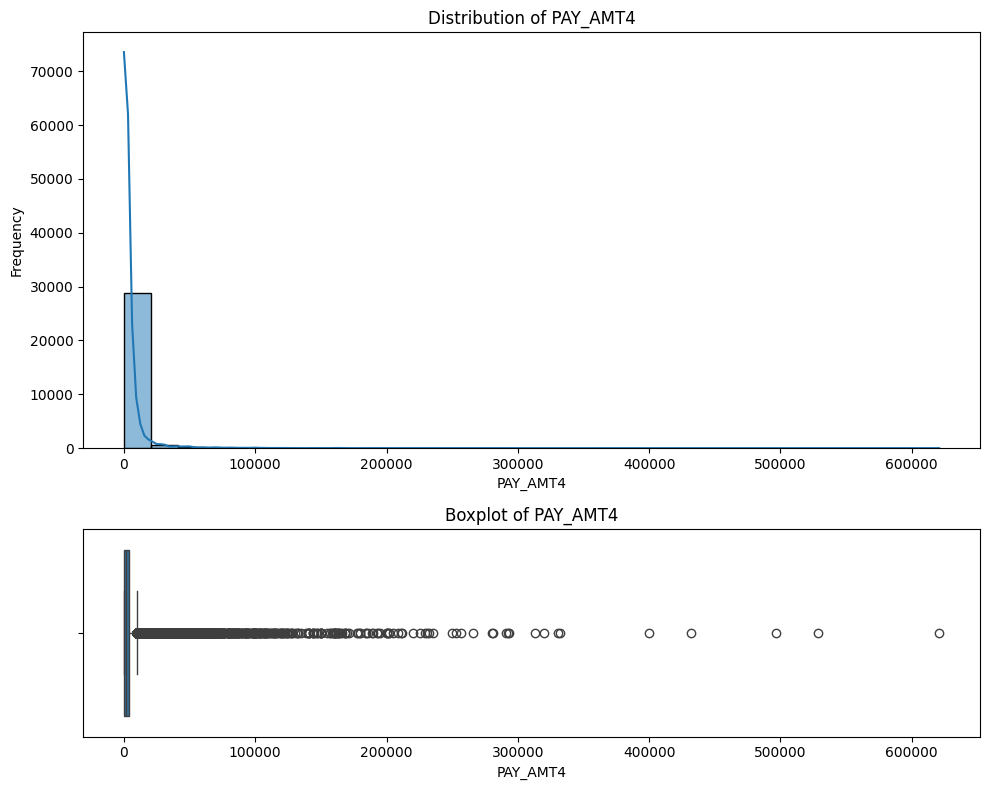

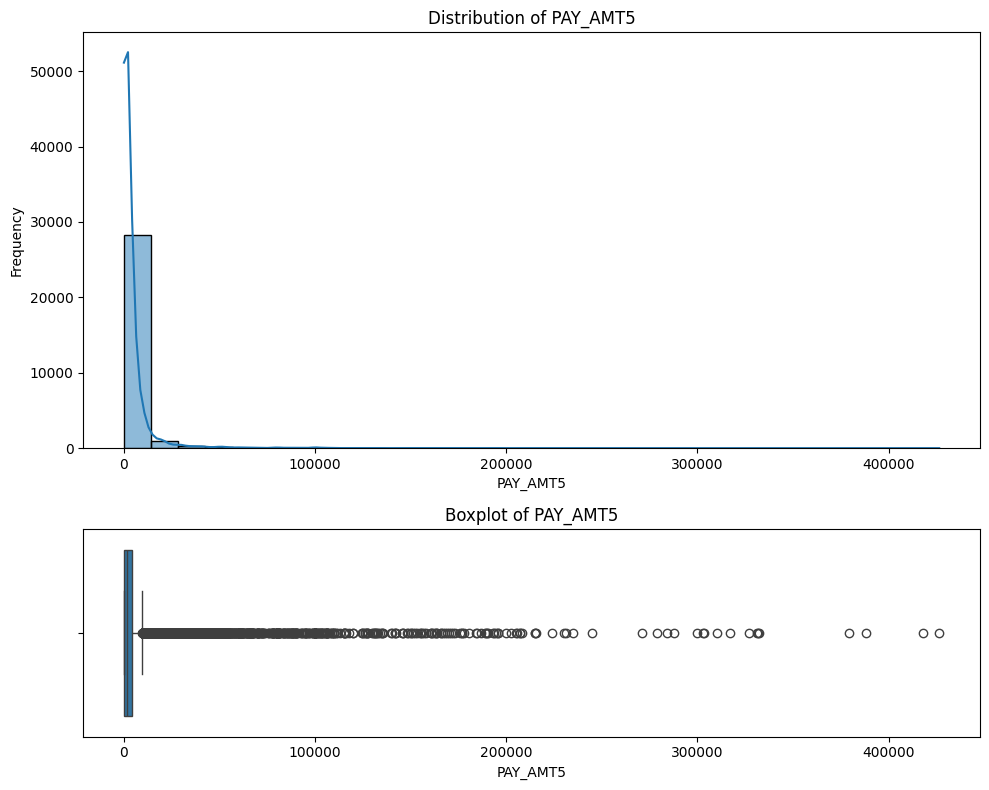

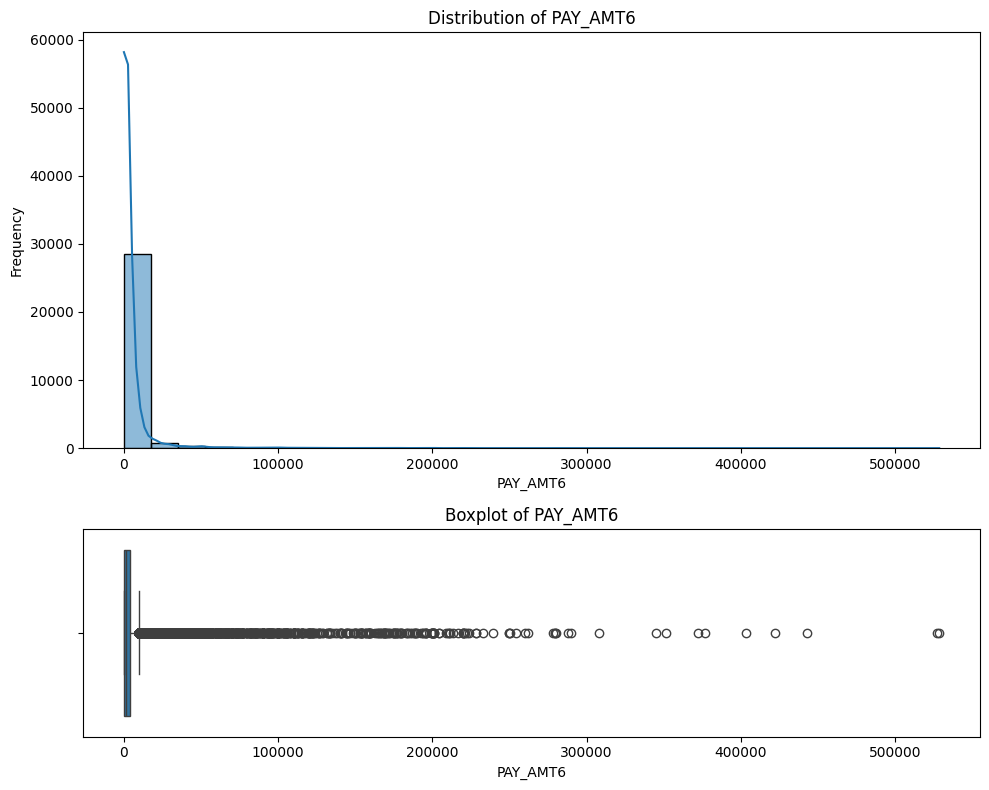

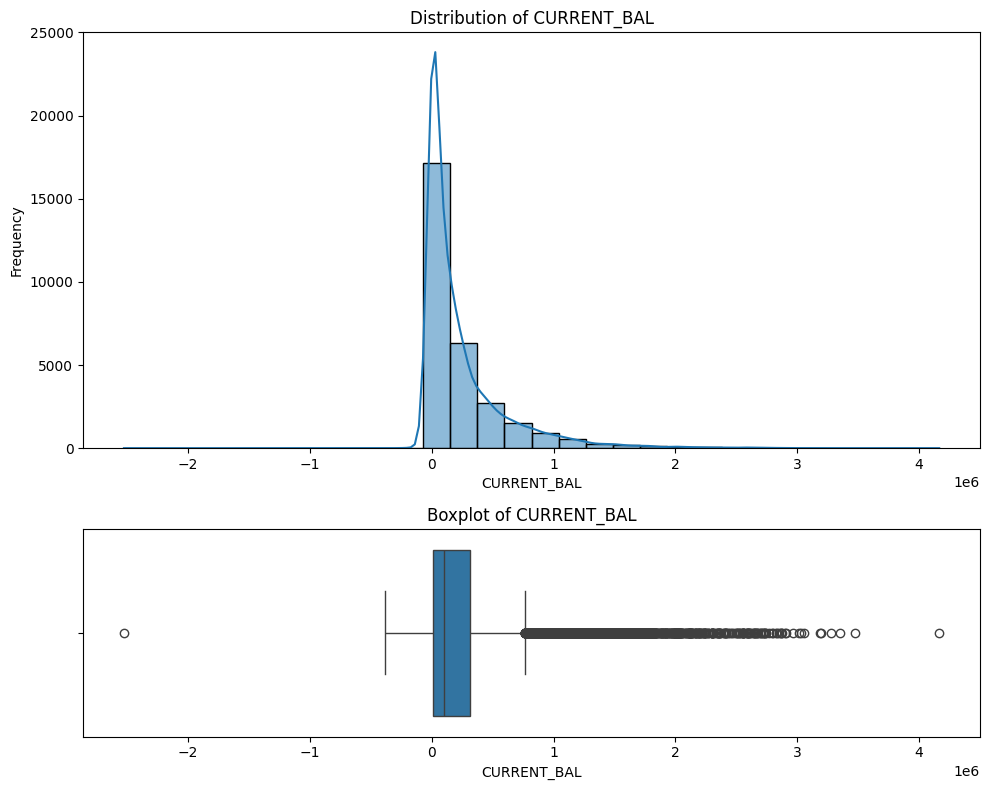

In [26]:
# plot the graphs for each numerical column
for c in num_cols:
    num_distribution(c)

## Categorical Column

In [27]:
# Checking unique values in each categorical column
for c in cat_cols:
    vals = df[c].unique()
    print(f"The unique values in column {c} are: \n{vals}\n")

The unique values in column SEX are: 
['2' '1']

The unique values in column EDUCATION are: 
['2' '1' '3' '4']

The unique values in column MARRIAGE are: 
['1' '2' '3']

The unique values in column PAY_1 are: 
['2' '-1' '0' '-2' '1' '3' '4' '8' '7' '5' '6']

The unique values in column PAY_2 are: 
['2' '0' '-1' '-2' '3' '5' '7' '4' '1' '6' '8']

The unique values in column PAY_3 are: 
['-1' '0' '2' '-2' '3' '4' '6' '7' '1' '5' '8']

The unique values in column PAY_4 are: 
['-1' '0' '-2' '2' '3' '4' '5' '7' '6' '1' '8']

The unique values in column PAY_5 are: 
['-2' '0' '-1' '2' '3' '5' '4' '7' '8' '6']

The unique values in column PAY_6 are: 
['-2' '2' '0' '-1' '3' '6' '4' '7' '8' '5']

The unique values in column default_pred are: 
['1' '0']



To make a better visual comprehension in the graphs, we need to order those value.

In [28]:
col_order1 = ['0', '1']
col_order2 = ['1', '2']
col_order3 = ['1', '2', '3']
col_order4 = ['1', '2', '3', '4']
col_order5 = ['-2', '-1', '0', '2', '3', '4', '5', '6', '7', '8']

In [29]:
# execute the value ordering
df['SEX'] = pd.Categorical(df['SEX'], col_order2)
df['EDUCATION'] = pd.Categorical(df['EDUCATION'], col_order4)
df['MARRIAGE'] = pd.Categorical(df['MARRIAGE'], col_order3)
df['PAY_1'] = pd.Categorical(df['PAY_1'], col_order5)
df['PAY_2'] = pd.Categorical(df['PAY_2'], col_order5)
df['PAY_3'] = pd.Categorical(df['PAY_3'], col_order5)
df['PAY_4'] = pd.Categorical(df['PAY_4'], col_order5)
df['PAY_5'] = pd.Categorical(df['PAY_5'], col_order5)
df['PAY_6'] = pd.Categorical(df['PAY_6'], col_order5)
df['default_pred'] = pd.Categorical(df['default_pred'], col_order1)


In [30]:
def check_distribution(col):
    """A function to visualize the data distribution for each categorical column.
    """
    # Histogram
    sns.histplot(df[col], bins=30, kde=False)
    plt.title(f"Distribution of {str(col).upper()}")
    plt.xlabel(col)
    plt.ylabel('Frequency')
        
    # Show the plot
    plt.show()

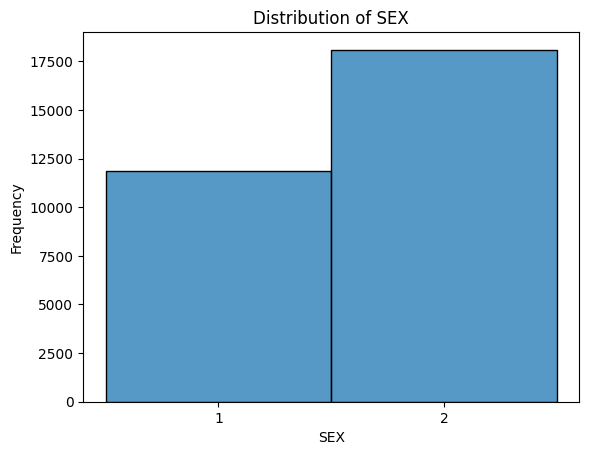

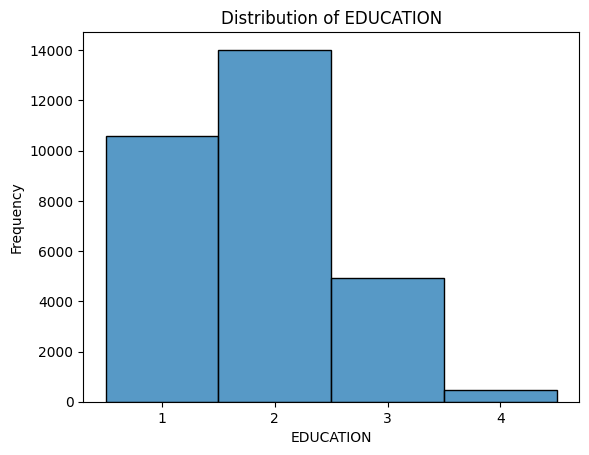

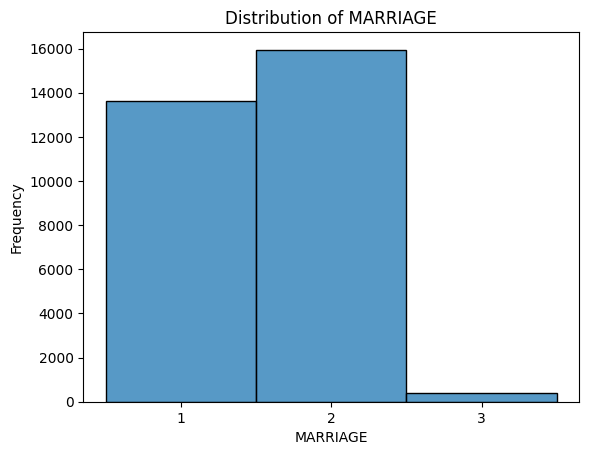

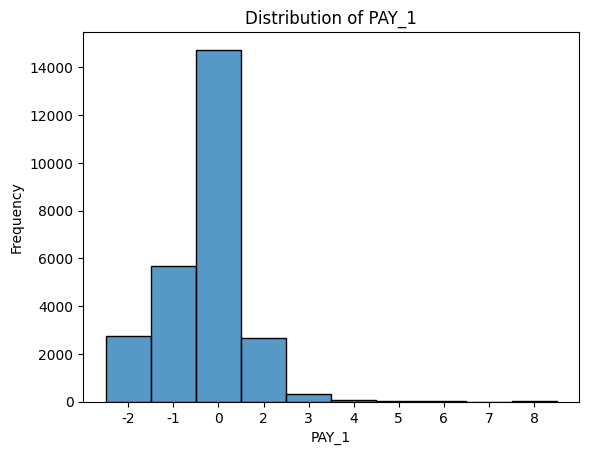

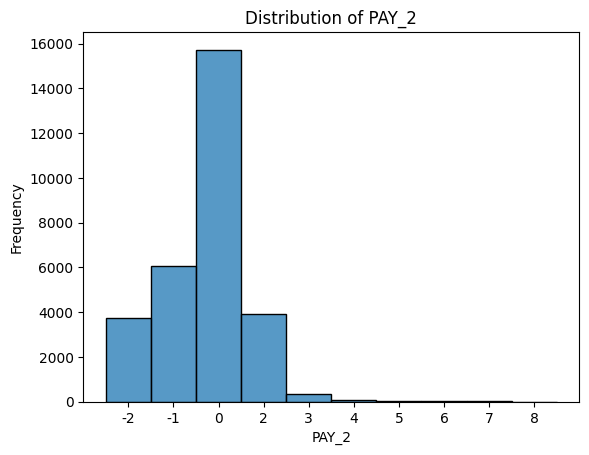

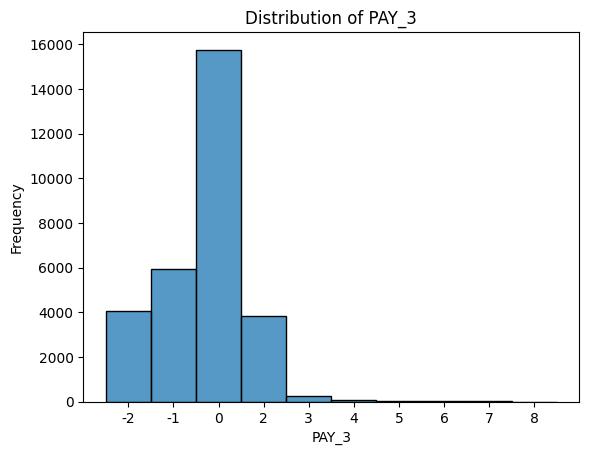

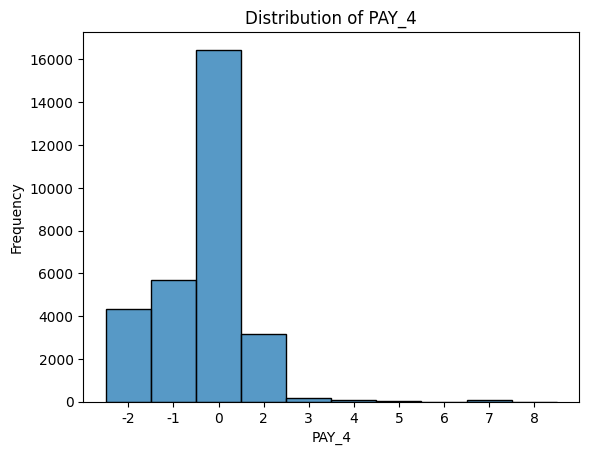

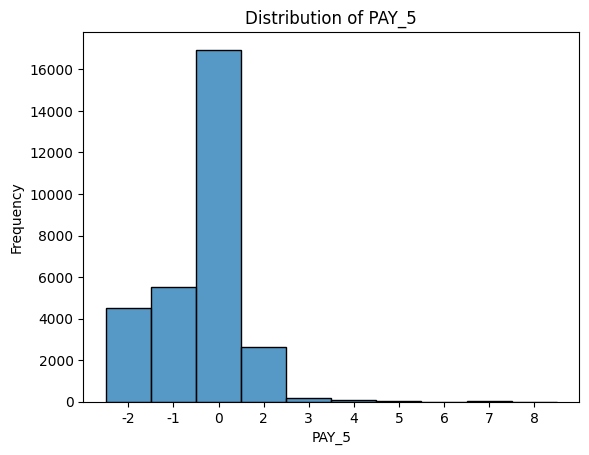

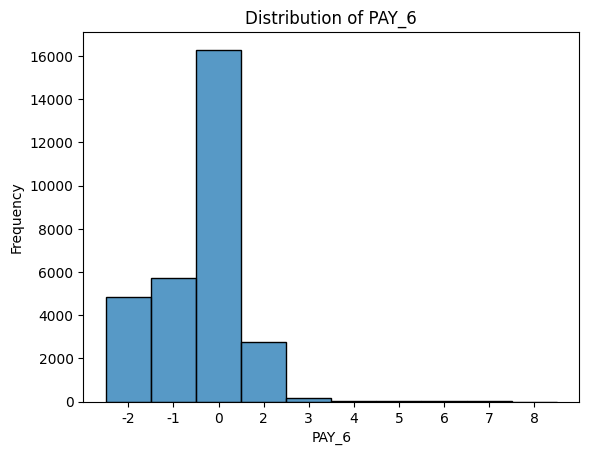

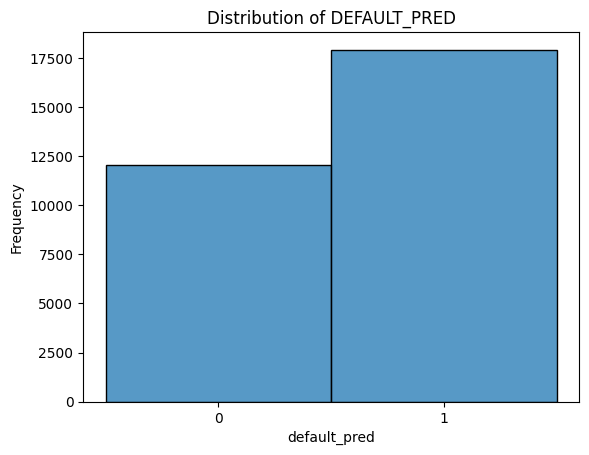

In [31]:
# plot the graphs for each categorical column
for c in cat_cols:
    check_distribution(c)

# Bivariate Analysis of Each Predictor to The Target Column 

## Categorical Column

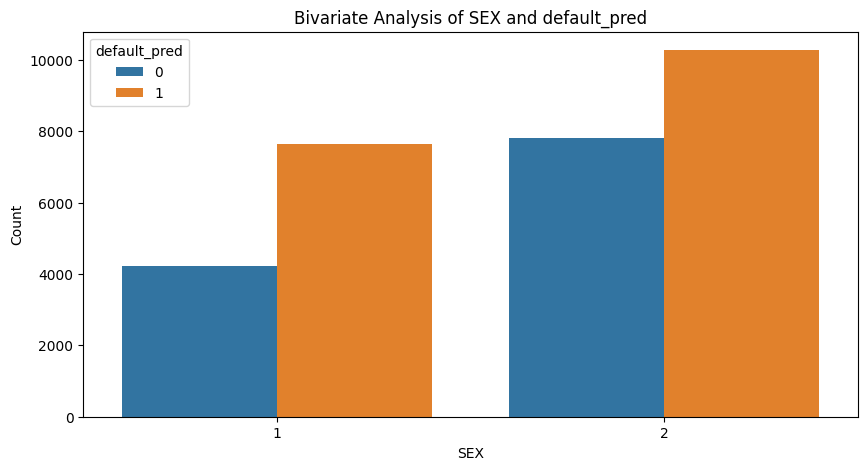

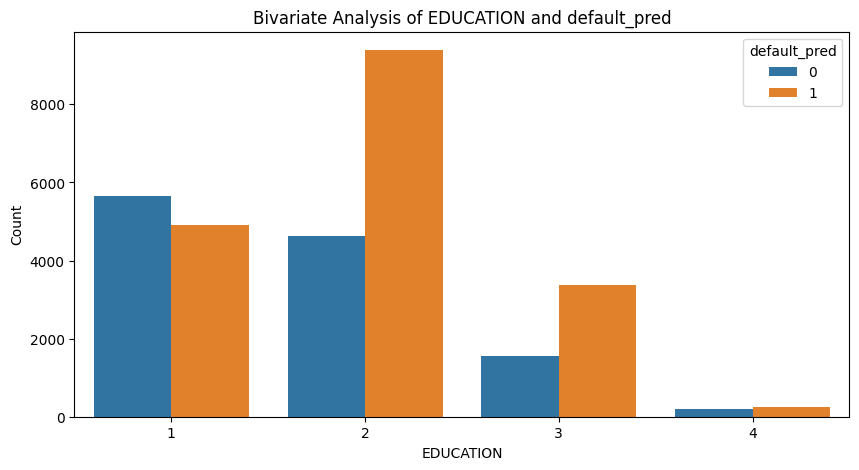

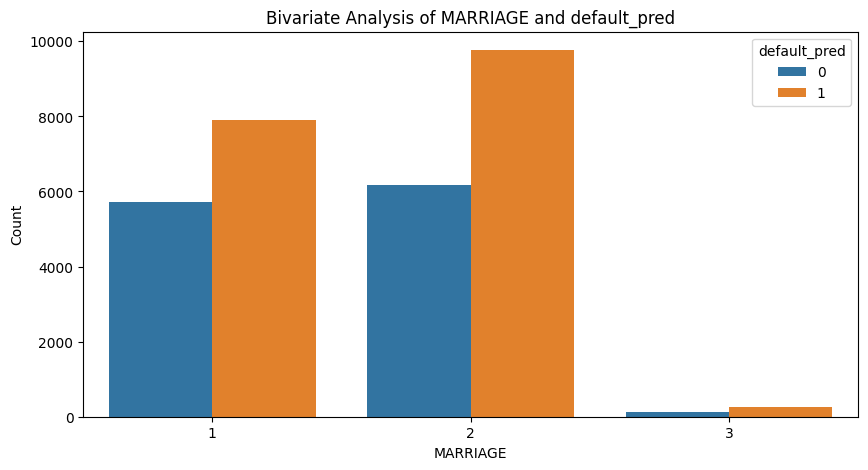

In [32]:
# Define the columns to be visualized
categorical = ['SEX', 'EDUCATION', 'MARRIAGE']

# Iterate over each column for bivariate analysis
for cat in categorical:
        plt.figure(figsize=(10, 5))

        # Create a countplot
        sns.countplot(data=df, x=cat, hue='default_pred')
        plt.title(f"Bivariate Analysis of {cat} and default_pred")
        plt.xlabel(cat)
        plt.ylabel("Count")

plt.show()

## Numeric Column

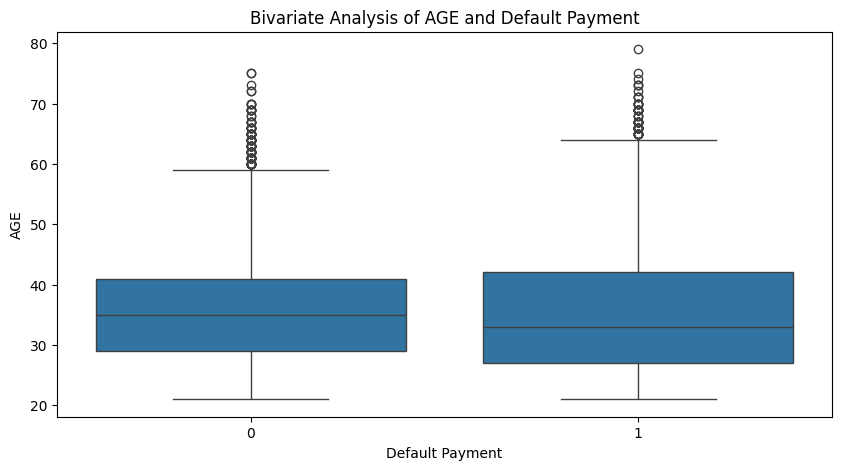

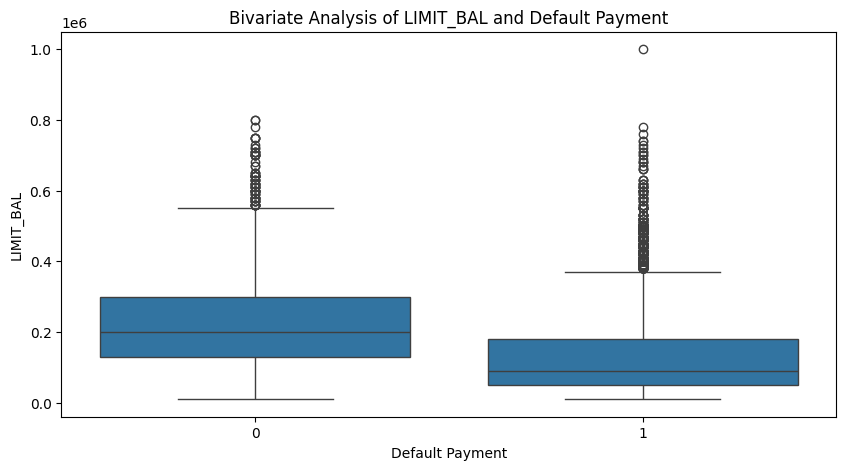

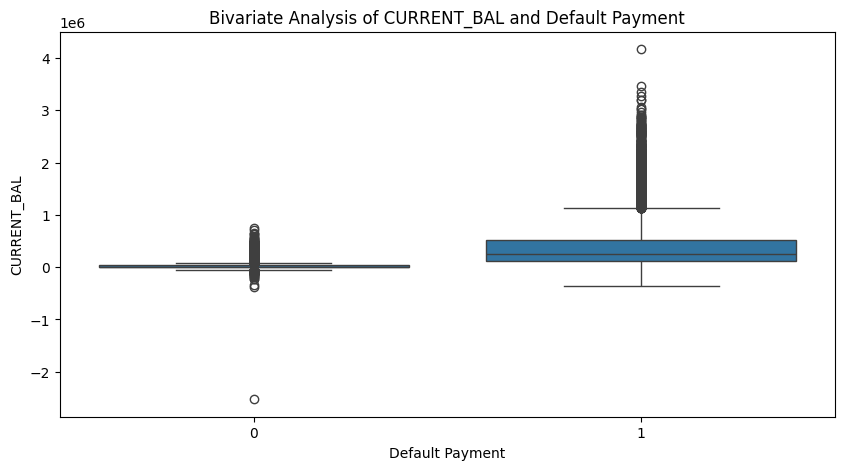

In [33]:
# Define the columns to be visualized
numeric = ['AGE', 'LIMIT_BAL', 'CURRENT_BAL']

# Iterate over each numumn for bivariate analysis
for num in numeric:
        plt.figure(figsize=(10, 5))
        
        # create the boxplots
        sns.boxplot(data=df, x='default_pred', y=num)
        plt.title(f"Bivariate Analysis of {num} and Default Payment")
        plt.xlabel("Default Payment")
        plt.ylabel(num)

# Correlation Matrix

To simplify the model training and avoid the multicollinearity, I decide to exclude all the features related to the historical bill statements and amounts payed.

In [34]:
# define the columns that is included in the model training
cols_mod = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'CURRENT_BAL', 'default_pred'] 

In [35]:
# check the correlation matrix between features
corr = df[cols_mod].corr().round(3)
corr.style.background_gradient(cmap='coolwarm')

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,CURRENT_BAL,default_pred
LIMIT_BAL,1.000000,0.025000,-0.231000,-0.111000,0.145000,0.266000,-0.360000
SEX,0.025000,1.000000,0.014000,-0.029000,-0.091000,-0.026000,-0.076000
EDUCATION,-0.231000,0.014000,1.000000,-0.137000,0.182000,0.011000,0.164000
MARRIAGE,-0.111000,-0.029000,-0.137000,1.000000,-0.412000,-0.028000,0.037000
AGE,0.145000,-0.091000,0.182000,-0.412000,1.000000,0.051000,-0.038000
CURRENT_BAL,0.266000,-0.026000,0.011000,-0.028000,0.051000,1.000000,0.470000
default_pred,-0.360000,-0.076000,0.164000,0.037000,-0.038000,0.470000,1.000000
